# Regression Analysis:
A. Predict the price of the Uber ride from a given pickup point to the agreed drop-off 
location. Perform following tasks:  
1. Pre-process the dataset.  
2. Identify outliers.  
3. Check the correlation.  
4. Implement linear regression and ridge, Lasso regression models.  
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.  
Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset 

#### Name : Parkale Shreya Jagdish
#### Roll No.: 2447060

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('uber.csv')
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.tail()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [5]:
df.isnull()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
199995,False,False,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False,False,False
199998,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [7]:
df.size

1800000

In [8]:
df.shape

(200000, 9)

In [9]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [10]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [11]:
df.drop(['Unnamed: 0', 'key'], axis=1, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [13]:
# Drop rows with missing values
df= df.dropna()

In [14]:
# Convert datetime columns to pandas datetime type
df.loc[:, 'pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

C:\Users\shrey\AppData\Local\Temp\ipykernel_13128\2476371173.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])


In [15]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1


In [16]:
# Identify outliers using box plots

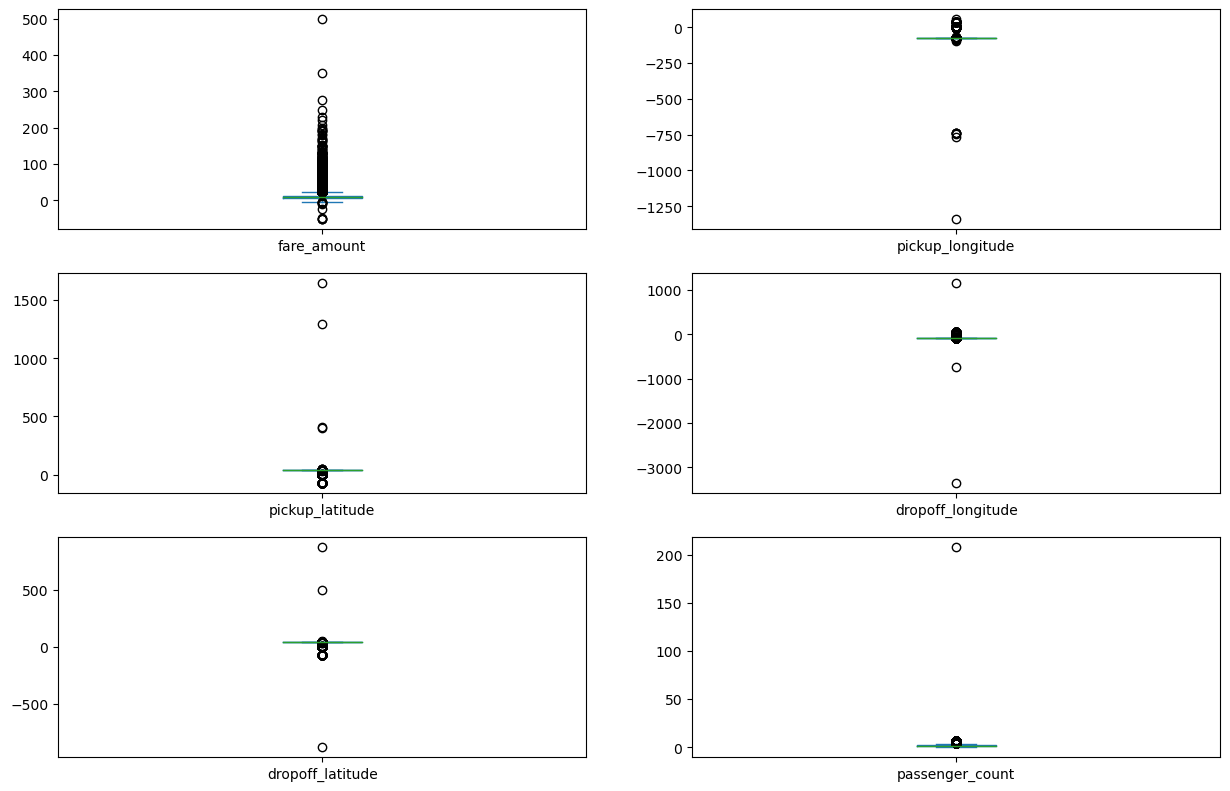

In [17]:
df.plot(kind = "box",subplots = True,layout = (6,2),figsize=(15,20)) 
plt.show()

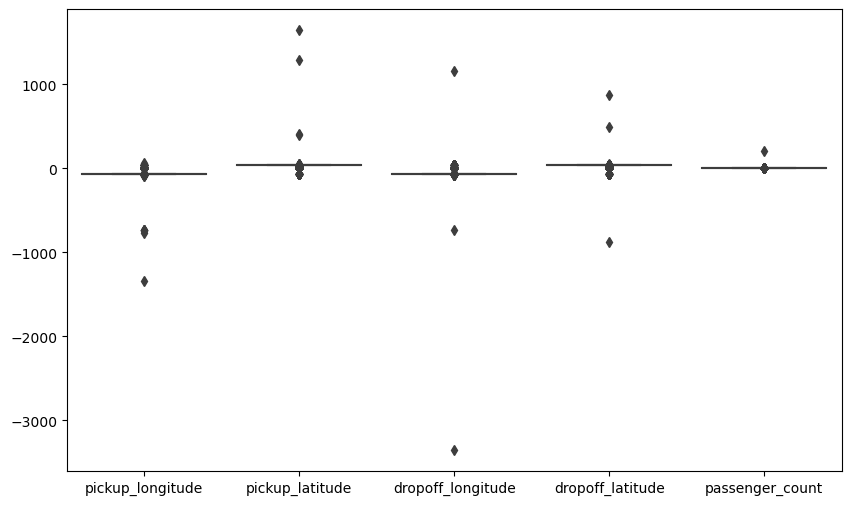

In [18]:
features = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
plt.figure(figsize =(10,6))
sns.boxplot(data = features)
plt.show()

In [19]:
# Define a function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to the dataset
# You may choose relevant columns for outlier removal
columns_to_check = ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']
data_cleaned = df.copy()

for column in columns_to_check:
    data_cleaned = remove_outliers(data_cleaned, column)

# Check the shape of the dataset before and after outlier removal
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", data_cleaned.shape)

Original dataset shape: (199999, 7)
Cleaned dataset shape: (148074, 7)


In [20]:
features1 = data_cleaned[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
target = data_cleaned['fare_amount']

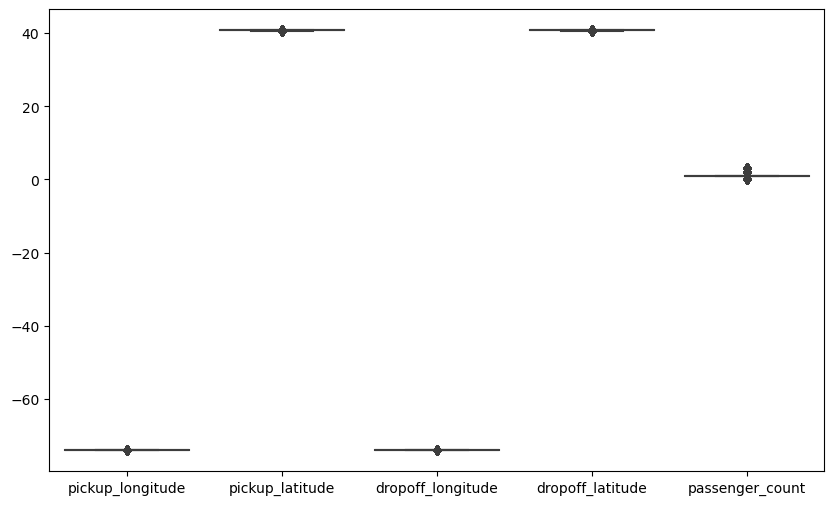

In [21]:
# Identify outliers using box plots if reamining
plt.figure(figsize=(10, 6))
sns.boxplot(data=features1)
plt.show()

Non-numeric columns to be handled: Index(['pickup_datetime'], dtype='object')


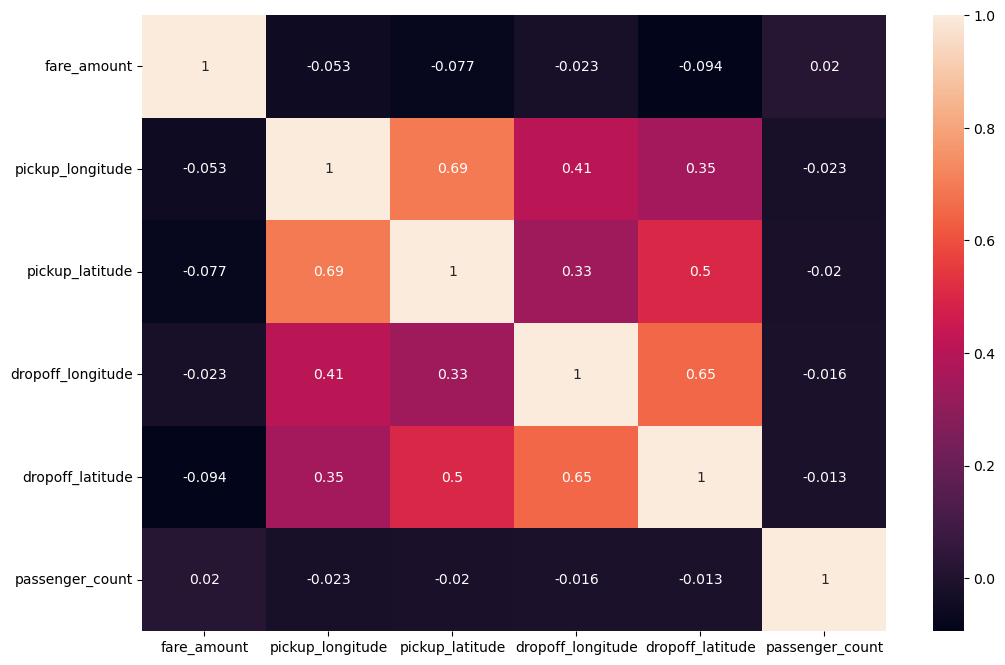

In [22]:
# Check for non-numeric columns
non_numeric_cols = data_cleaned.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns to be handled:", non_numeric_cols)

# Drop non-numeric columns for correlation calculation
data_numeric = data_cleaned.select_dtypes(include=[np.number])

# Correlation matrix
correlation_matrix = data_numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

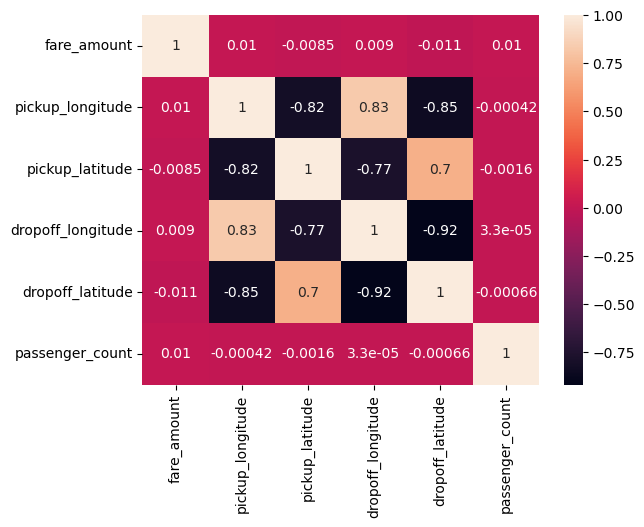

In [23]:
# Check the correlation
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score , accuracy_score
from sklearn.preprocessing import StandardScaler

In [25]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features1, target, test_size=0.3, random_state=42)


In [26]:
#  Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Implement Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_scaled, y_train)
y_pred_linear = linear_regressor.predict(X_test_scaled)

In [28]:
# Implement Ridge Regression
ridge_regressor = Ridge(alpha=1.0)
ridge_regressor.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_regressor.predict(X_test_scaled)

In [29]:
# Implement Lasso Regression
lasso_regressor = Lasso(alpha=0.1)
lasso_regressor.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_regressor.predict(X_test_scaled)

In [30]:
# Evaluate models
def evaluate_model(y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return rmse, mae, r2

In [31]:
linear_rmse, linear_mae, linear_r2 = evaluate_model(y_test, y_pred_linear)
ridge_rmse, ridge_mae, ridge_r2 = evaluate_model(y_test, y_pred_ridge)
lasso_rmse, lasso_mae, lasso_r2 = evaluate_model(y_test, y_pred_lasso)

In [32]:
# Print evaluation metrics
print("Linear Regression: RMSE =", linear_rmse, ", MAE =", linear_mae, ", R2 =", linear_r2)
print("Ridge Regression: RMSE =", ridge_rmse, ", MAE =", ridge_mae, ", R2 =", ridge_r2)
print("Lasso Regression: RMSE =", lasso_rmse, ", MAE =", lasso_mae, ", R2 =", lasso_r2)

Linear Regression: RMSE = 3.8533143162490022 , MAE = 3.0397397916373685 , R2 = 0.013771817796720986
Ridge Regression: RMSE = 3.8533143125449008 , MAE = 3.039739741223484 , R2 = 0.013771819692797393
Lasso Regression: RMSE = 3.8620410708154447 , MAE = 3.045289126348603 , R2 = 0.00929965881459971
